#Bipolar to Unipolar

In [ ]:
import pandas as pd

# Function to convert bipolar signals to unipolar (referential) using A1 as reference
def convert_bipolar_to_unipolar(bipolar_signals):
    # Assuming A1 as the reference and its voltage V(A1) is 0
    v_A1 = 0

    # Extract the bipolar signals from the input
    Fp2_F4 = bipolar_signals['Fp2-F4']
    F4_C4 = bipolar_signals['F4-C4']
    C4_P4 = bipolar_signals['C4-P4']
    P4_O2 = bipolar_signals['P4-O2']
    C4_A1 = bipolar_signals['C4-A1']

    # Step 1: Calculate unipolar values
    v_C4 = C4_A1 + v_A1  # V(C4) = C4-A1 + V(A1)
    v_F4 = F4_C4 + v_C4  # V(F4) = F4-C4 + V(C4)
    v_Fp2 = Fp2_F4 + v_F4  # V(Fp2) = Fp2-F4 + V(F4)
    v_P4 = v_C4 - C4_P4  # V(P4) = V(C4) - C4-P4
    v_O2 = v_P4 - P4_O2  # V(O2) = V(P4) - P4-O2

    # Step 2: Return the calculated unipolar values as a dictionary
    unipolar_signals = {
        'Fp2': v_Fp2,
        'F4': v_F4,
        'C4': v_C4,
        'P4': v_P4,
        'O2': v_O2
    }

    return unipolar_signals

# Read the bipolar signals from the CSV file
input_file = 'narco3_data.txt'  # Assuming narco1.csv contains the bipolar signals
bipolar_df = pd.read_csv(input_file)

# Initialize a list to store the unipolar signals for each row
unipolar_data = []

# Loop over each row in the dataframe to process the bipolar signals
for index, row in bipolar_df.iterrows():
    # Create a dictionary of the bipolar signals for this row
    bipolar_signals = {
        'Fp2-F4': row['2'],
        'F4-C4': row['3'],
        'C4-P4': row['4'],
        'P4-O2': row['5'],
        'C4-A1': row['6']
    }

    # Convert the bipolar signals to unipolar
    unipolar_signals = convert_bipolar_to_unipolar(bipolar_signals)

    # Append the unipolar signals to the list
    unipolar_data.append(unipolar_signals)

# Create a DataFrame from the unipolar data
unipolar_df = pd.DataFrame(unipolar_data)

output_file = 'narco3_unipolar.csv'
unipolar_df.to_csv(output_file, index=False)

print(f"Unipolar signals have been saved to {output_file}")

FileNotFoundError: [Errno 2] No such file or directory: 'narco3_data.txt'

#ICA

In [ ]:
!pip install mne
!pip install edfio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 53.9 MB/s eta 0:00:00


Extracting EDF parameters from /content/narco4_unipolar_filtered.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 20121599  =      0.000 ... 39299.998 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: Fp2, F4, C4, P4, O2
 chs: 5 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: 2007-01-01 22:16:02 UTC
 nchan: 5
 projs: []
 sfreq: 512.0 Hz
 subject_info: <subject_info | his_id: narco4>
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 H

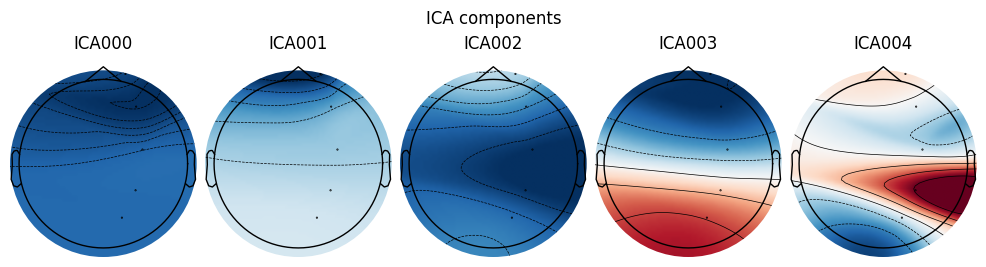

Creating RawArray with float64 data, n_channels=5, n_times=20107264
    Range : 14336 ... 20121599 =     28.000 ... 39299.998 secs
Ready.
Using matplotlib as 2D backend.


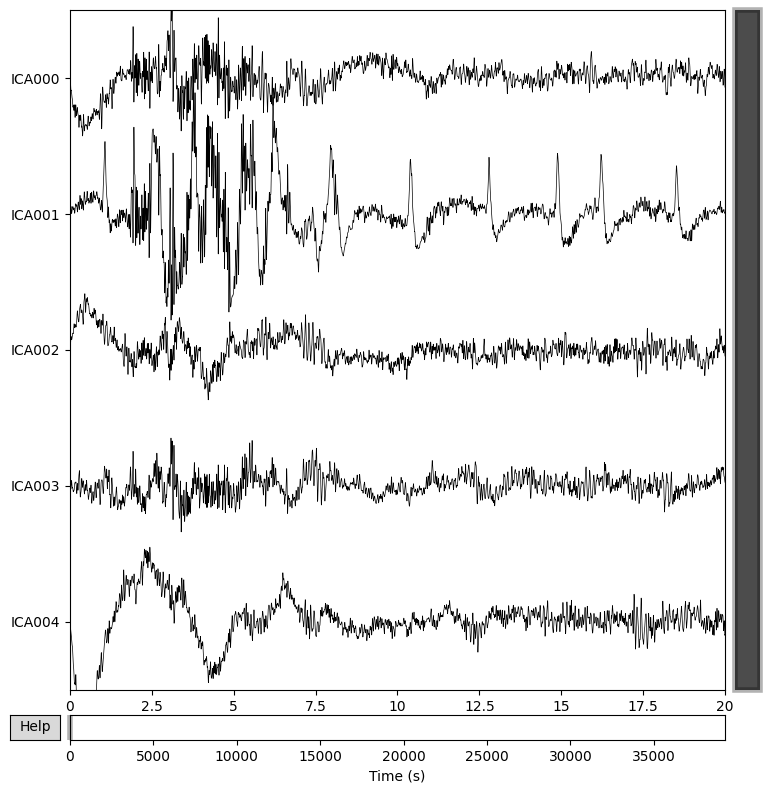

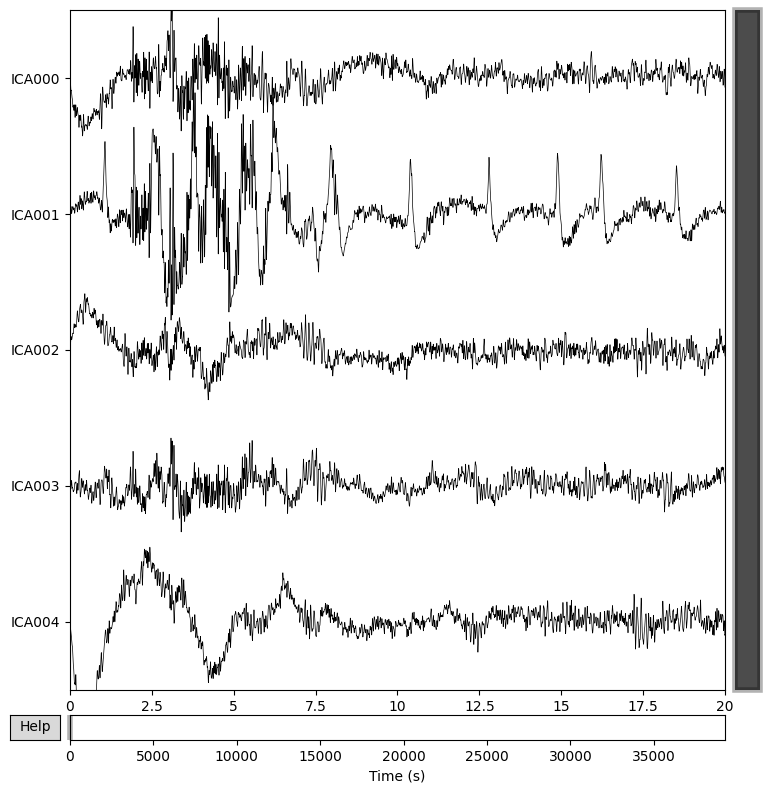

In [ ]:
import mne
from mne.preprocessing import ICA
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Step 1: Load the EDF file
file_path = '/content/narco4_unipolar_filtered.edf'
raw = mne.io.read_raw_edf(file_path, preload=True)
print(raw.info)

# Step 2: Remove the first 28 seconds
raw.crop(tmin=28)  # Crop data from 28s onwards

# Step 3: Set EEG montage (optional, for standard electrode positioning)
raw.set_montage('standard_1020')

# Step 4: Filter the data (e.g., bandpass filter between 0.1-30 Hz for EEG)
raw.filter(0.1, 30., fir_design='firwin')

# Step 5: Apply ICA for all channels together
ica = ICA(n_components=5, random_state=97, max_iter=800)

# Step 6: Fit the ICA model to the EEG data (all channels simultaneously)
ica.fit(raw)

# Step 7: Plot the ICA components to visually inspect artifacts
ica.plot_components()  # This will plot all the ICA components for analysis

# Step 8: Optionally, plot specific ICA components for individual inspection
ica.plot_sources(raw)

Creating RawArray with float64 data, n_channels=5, n_times=20107264
    Range : 14336 ... 20121599 =     28.000 ... 39299.998 secs
Ready.


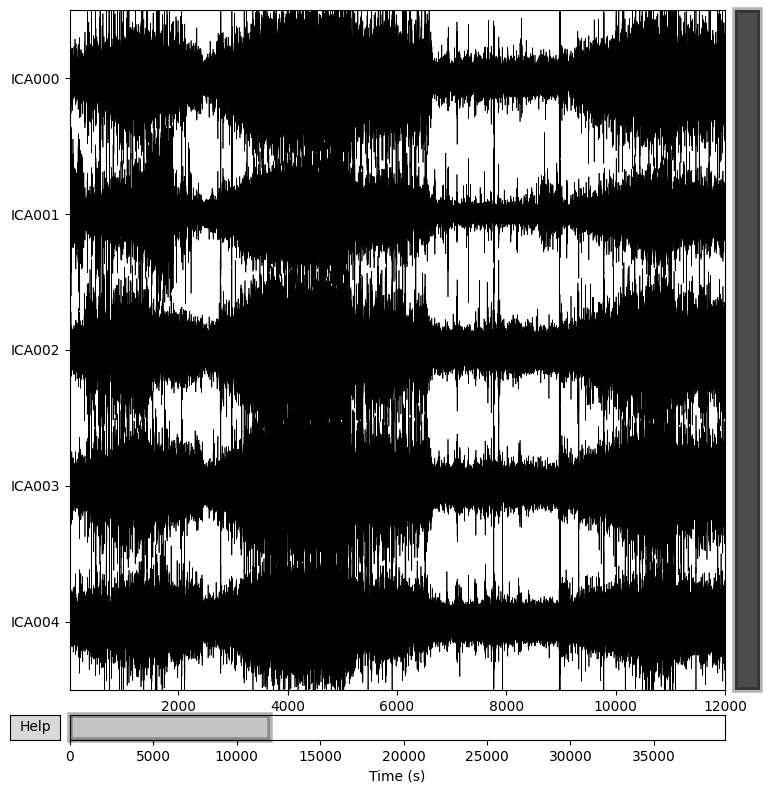

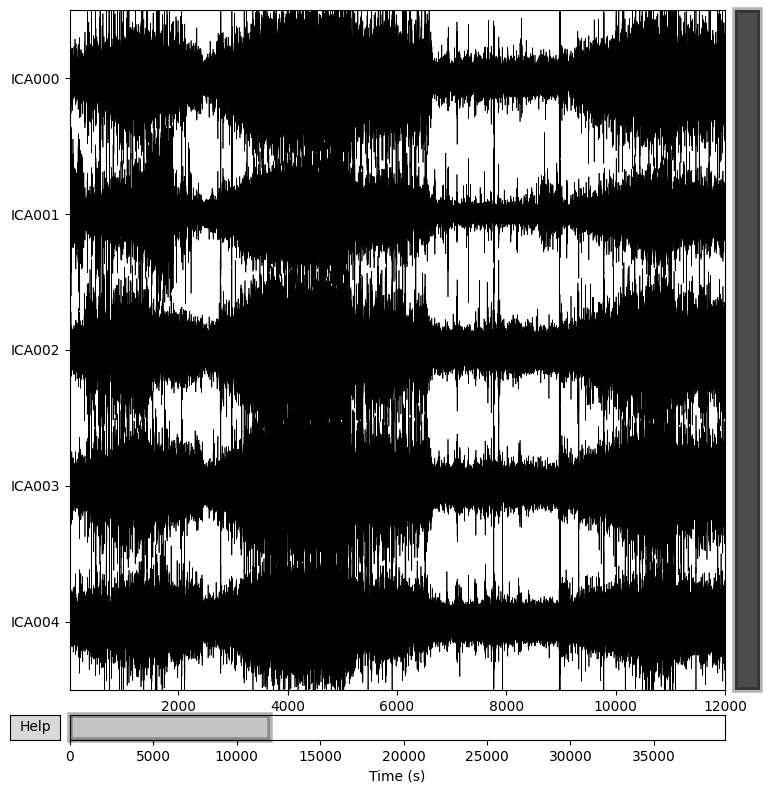

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50, 50)
ica.plot_sources(raw, start=20, stop=12000)  # Display from 10 min (600s) to 20 min (1200s)

Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 3 ICA components
    Projecting back using 5 PCA components


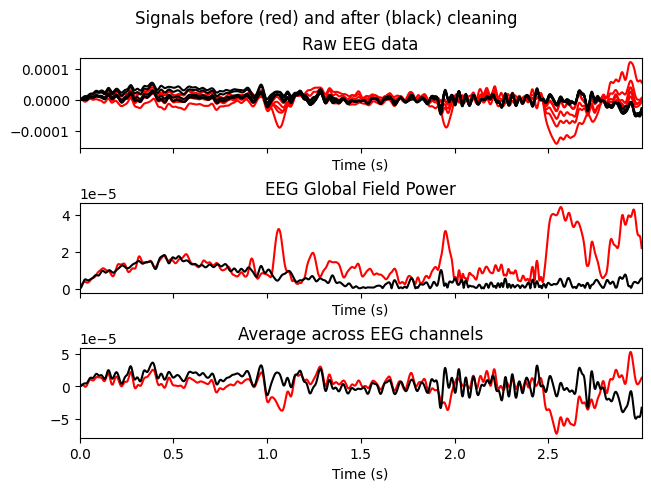

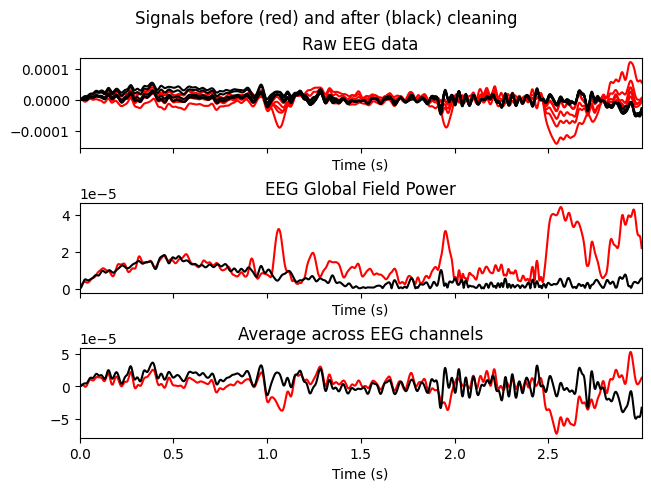

In [ ]:
ica.plot_overlay(raw, exclude=[1, 3, 4])

Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 3 ICA components
    Projecting back using 5 PCA components


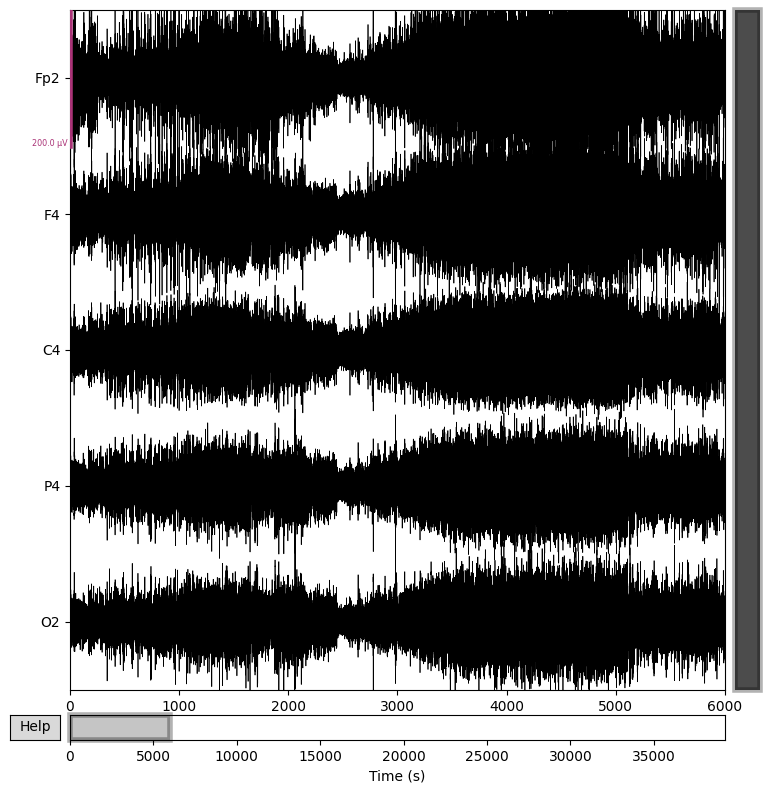

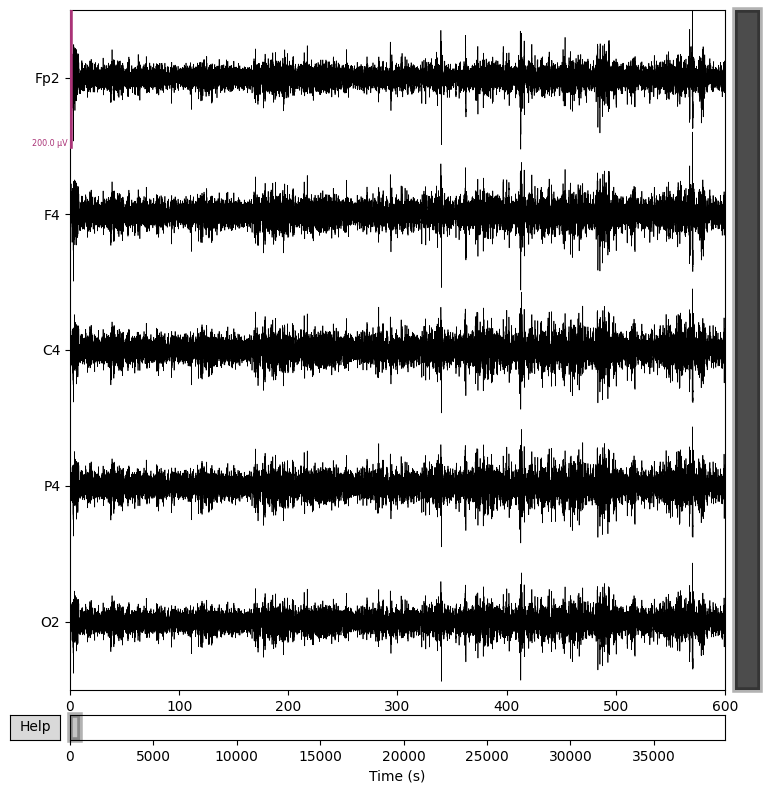

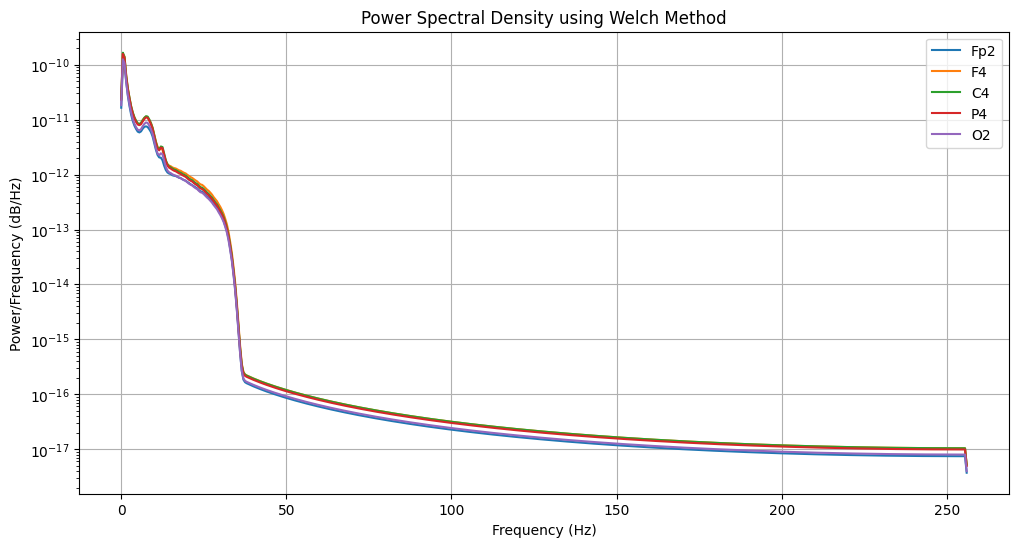

In [ ]:
import matplotlib.pyplot as plt

# Ensure inline plots are large enough
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)
# Step 8: Exclude components based on your assessment
# For example, remove ICA000, ICA002, and ICA003 to optimize results
ica.exclude = [1, 3, 4]  # Exclude components: ICA000, ICA002, ICA003

# Step 9: Apply ICA to remove unwanted components
cleaned_raw = ica.apply(raw.copy())  # Clean the data

# Step 10: Visualize original and cleaned data with specified scale
scalings = {'eeg': 100e-6}  # Set scale to 100 µV for EEG channels

# Plot original EEG data for 10 minutes
raw.plot(title='Original EEG Data', scalings=scalings, duration=6000, show=True)

# Plot cleaned EEG data for 10 minutes
cleaned_raw.plot(title='Cleaned EEG Data', scalings=scalings, duration=600, show=True)
# Step 11: Save the cleaned data as an EDF file
output_file_path = 'narco4_cleaned_ica.edf'
mne.export.export_raw(output_file_path, cleaned_raw, fmt='edf',overwrite=True)

# Step 10: Apply Welch Method
# Get the data from the cleaned raw object
data, times = cleaned_raw[:, :]  # Fetch data

# Set the sampling frequency (in Hz)
sampling_freq = cleaned_raw.info['sfreq']  # Sampling frequency

# Parameters for Welch's method
window = 'hamming'  # Type of window
nperseg = 1024 if len(data[0]) >= 1024 else len(data[0])  # Set segment length

# Compute the PSD using Welch's method
frequencies, psd = welch(data, fs=sampling_freq, window=window, nperseg=nperseg, axis=1)

# Step 11: Plot the PSD
plt.figure(figsize=(12, 6))
for i in range(len(cleaned_raw.ch_names)):
    # Plot each channel's PSD
    plt.semilogy(frequencies, psd[i], label=cleaned_raw.ch_names[i])
plt.title('Power Spectral Density using Welch Method')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.grid()
plt.show()